In [81]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import pandas as pd


In [82]:
#load the data
#data = np.genfromtxt('real.txt')
df = pd.read_csv('RealEstateFull.csv')

df.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [83]:
#features
#X = data[:,:5]
#label
#y = np.reshape(data[:,5:6],(data.shape[0],))
X = df[['Location','Size',"Bedrooms",'Bathrooms','Price/SQ.Ft']]
#X = np.array(X)

y = df['Price']

In [84]:
#X.iloc[:, 0]

In [85]:
#print(y)

In [86]:
X.shape

(781, 5)

In [87]:
labelencoder_X = LabelEncoder()
X.iloc[:,0]=labelencoder_X.fit_transform(X.iloc[:,0])
#X.iloc[:,1]=labelencoder_X.fit_transform(X.iloc[:,1])
#X['Location'] = labelencoder_X.fit_transform(X['Location'])
onehotencoder1 = OneHotEncoder(categorical_features = [0] )
#onehotencoder2 = OneHotEncoder(categorical_features = [1] )
X= onehotencoder1.fit_transform(X).toarray()
#X= onehotencoder2.fit_transform(X).toarray()
#onehotencoder1.fit(X)
#onehotencoder2.fit(X)
#onehotencoder1.transform(X).toarray()
#onehotencoder2.transform(X).toarray()
#X.toarray()



In [88]:
#print(X)
X.shape

(781, 58)

In [89]:
X[:5,54]

array([ 2371.,  2818.,  3032.,  3540.,  1249.])

In [90]:
#labelencoder_X = LabelEncoder()
#df['Location'] = labelencoder_X.fit_transform(df['Location'])
#onehotencoder = OneHotEncoder(categorical_features = [7] )
#X = onehotencoder.fit_transform(X).toarray()

In [91]:
#df.head()

In [92]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [93]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.transform(y_test)

In [94]:
#create model
#model = RandomForestRegressor()
#X_train = StandardScaler().fit_transform(X_train)
#X_train = Normalizer().fit_transform(X_train)
#y_train = StandardScaler().fit_transform(y_train)
#y_train = Normalizer().fit_transform(y_train)
#X_test = StandardScaler().fit_transform(X_test)
#X_test = Normalizer().fit_transform(X_test)
#y_test = StandardScaler().fit_transform(y_test)
#y_test = Normalizer().fit_transform(y_test)
#model = LinearRegression()
model = RandomForestRegressor(random_state=0)

In [95]:
#fit model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
y_pred = model.predict(X_test)
y_test.shape


(196,)

In [97]:
#print(model.predict(np.array([[n1,n2]])))
model.score(X_test,y_test)


-1.3853276623472563e+25

In [98]:
model.score(X_train,y_train)

0.86288595094782994

In [99]:
X.shape

(781, 58)

In [100]:
y.shape

(781,)

In [101]:
plt.scatter(X_test[:,54],y_test,color='blue')
plt.scatter(X_test[:,54],model.predict(X_test),color='orange')
plt.xlabel('Size')
plt.ylabel('Price')

Text(0,0.5,u'Price')

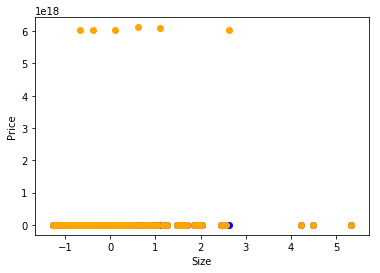

In [102]:
plt.show()

In [103]:
X_test[:5,54]

array([-0.56365338, -0.26740671, -0.34330462,  0.43648515, -0.9798677 ])